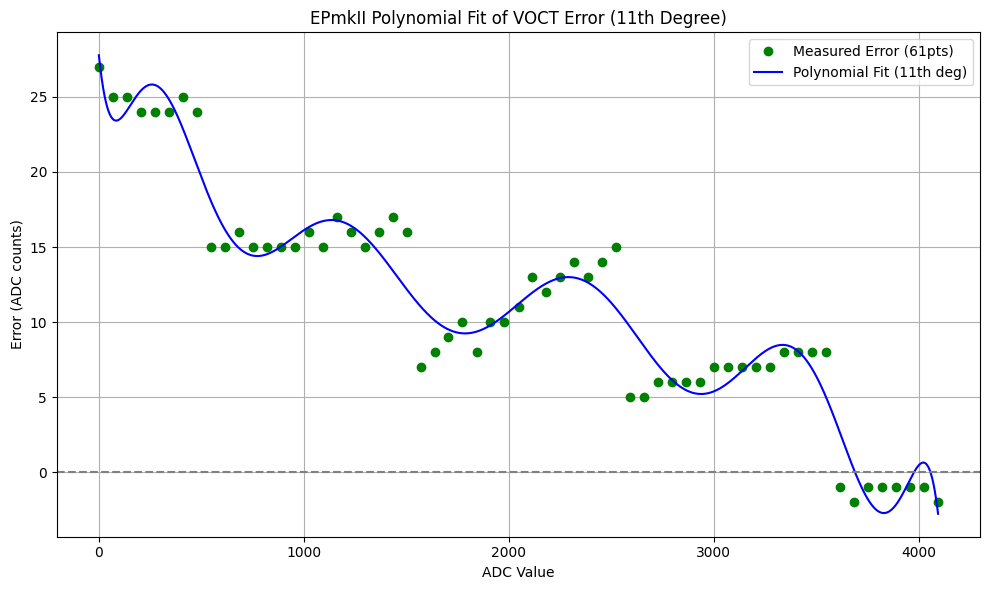


// EPmkII VOCT用誤差補正 LUT（11次多項式フィット, int16_t）
const int16_t VOCTInputErrorLUT[4096] = {
28,28,28,27,27,27,27,27,27,27,27,27,26,26,26,26,
26,26,26,26,26,26,26,25,25,25,25,25,25,25,25,25,
25,25,25,25,25,25,24,24,24,24,24,24,24,24,24,24,
24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,
24,24,24,24,24,24,24,23,23,23,23,23,23,23,23,23,
23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,
23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,
24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,
24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,
24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,
25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,
25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,
25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,
25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,
26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,
26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,
26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,
26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,
26,26,26,26,26,26,26,26,26,26,

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 実測データ（セミトーン0〜60）
semitones = np.arange(61)
measured = np.array([
27,93,161,229,297,365,435,502,561,629,698,766,
834,902,971,1040,1107,1177,1244,1312,1381,1450,
1518,1577,1646,1715,1784,1851,1921,1989,2059,2129,
2196,2265,2334,2402,2471,2540,2599,2667,2736,2804,
2872,2941,3010,3078,3147,3215,3283,3352,3420,3489,
3557,3616,3684,3753,3821,3889,3957,4026,4093,
])

# 理想値（12bit ADCスケールでセミトーンを4095に割り当て）
ideal_adc = np.round((semitones / 60) * 4095).astype(int)
error = measured - ideal_adc

# ----------------------------
# 多項式で誤差をフィット（n次）
# ----------------------------
deg = 11
coeffs = np.polyfit(ideal_adc, error, deg)
poly = np.poly1d(coeffs)

# ADC範囲に対して誤差補正値を計算
adc_values = np.arange(4096)
poly_error = poly(adc_values)
smoothed_error = np.round(poly_error).astype(int)

# ----------------------------
# グラフ表示
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(ideal_adc, error, 'go', label='Measured Error (61pts)')
plt.plot(adc_values, poly_error, 'b-', label=f'Polynomial Fit ({deg}th deg)')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f"EPmkII Polynomial Fit of VOCT Error ({deg}th Degree)")
plt.xlabel("ADC Value")
plt.ylabel("Error (ADC counts)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# C配列として出力
# ----------------------------
print(f"\n// EPmkII VOCT用誤差補正 LUT（{deg}次多項式フィット, int16_t）")
print("const int16_t VOCTInputErrorLUT[4096] = {")
for i, val in enumerate(smoothed_error):
    sep = "," if i < 4095 else ""
    lineend = "\n" if i % 16 == 15 or i == 4095 else ""
    print(f"{val:2d}", end=sep + lineend)
print("};")

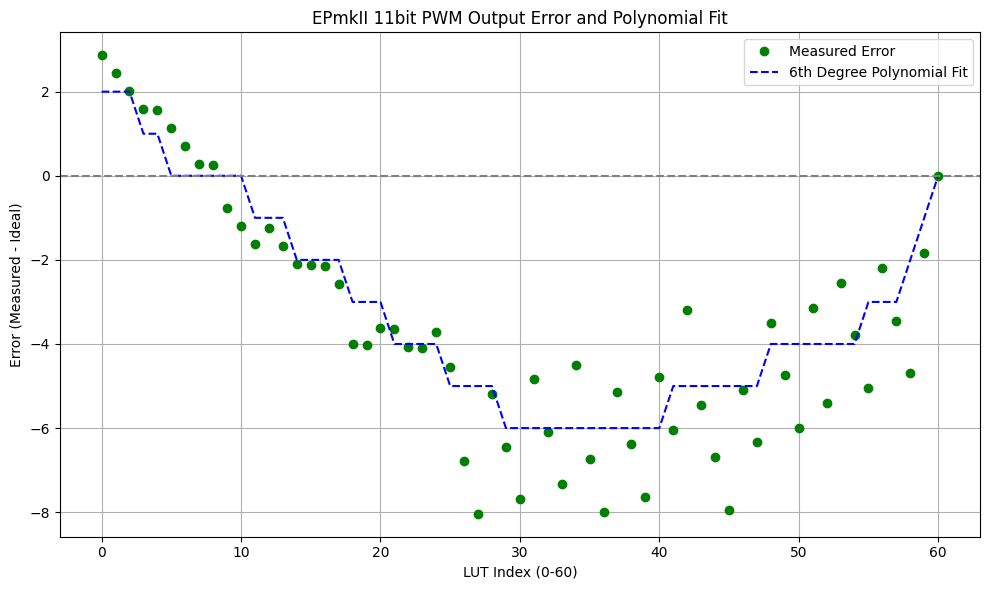


// EPmkII 11bit PWM DC出力誤差補正 LUT（8次多項式フィット, int16_t）
const int16_t PWMCVDCOutputErrorLUT[61] = {
 2, 2, 2, 1, 1, 0, 0, 0, 0, 0,
 0,-1,-1,-1,-2,-2,-2,-2,-3,-3,
-3,-4,-4,-4,-4,-5,-5,-5,-5,-6,
-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,
-6,-5,-5,-5,-5,-5,-5,-5,-4,-4,
-4,-4,-4,-4,-4,-3,-3,-3,-2,-1,
 0
};


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 実測データ（0〜2047のPWM → フィルタ出力電圧0-5000mV）
measured = np.array([
    7,89,171,253,336,418,500,582,665,748,
    830,912,996,1078,1160,1243,1326,1408,1490,
    1573,1657,1740,1822,1905,1989,2070,2150,2230,
    2320,2400,2480,2570,2650,2730,2820,2900,2980,
    3070,3150,3230,3320,3400,3490,3570,3650,3730,
    3820,3900,3990,4070,4150,4240,4320,4410,4490,
    4570,4660,4740,4820,4910,5000,
])

# 11bit値に変換
mv_to_11bit_ratio = 2047.0 / 5000.0
measured = measured * mv_to_11bit_ratio

# LUTインデックス（0〜60）
index = np.arange(61)

# 理想値（0〜2047を直線的に割ったもの）
ideal = np.linspace(0, 2047, 61).astype(int)

# 誤差
error = measured - ideal

# 多項式フィッティング（例：6次）
coeffs = np.polyfit(index, error, deg=8)
poly = np.poly1d(coeffs)

# LUT誤差補正値
poly_error = poly(index).astype(int)

# ----------------------------
# グラフ表示
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(index, error, 'go', label='Measured Error')
plt.plot(index, poly_error, 'b--', label='6th Degree Polynomial Fit')
plt.axhline(0, color='gray', linestyle='--')
plt.title("EPmkII 11bit PWM Output Error and Polynomial Fit")
plt.xlabel("LUT Index (0-60)")
plt.ylabel("Error (Measured - Ideal)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# C配列として出力
# ----------------------------
print("\n// EPmkII 11bit PWM DC出力誤差補正 LUT（8次多項式フィット, int16_t）")
print("const int16_t PWMCVDCOutputErrorLUT[61] = {")
for i, val in enumerate(poly_error):
    sep = "," if i < 60 else ""
    lineend = "\n" if i % 10 == 9 or i == 60 else ""
    print(f"{val:2d}", end=sep + lineend)
print("};")
